In [2]:
from root_pandas import read_root
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pdlabels
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, precision_score, recall_score
import gc ; gc.enable()

Welcome to JupyROOT 6.16/00


/home/colmsam/miniconda/envs/cern_env/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.4 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
test = read_root('TaggingJpsiK2012_tiny.root')

/home/colmsam/miniconda/envs/cern_env/lib/python3.7/site-packages/root_pandas/readwrite.py:320: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


In [10]:
[c for c in test.columns if c[:7] == 'TwoBody']

['TwoBody_DIRA_OWNPV',
 'TwoBody_DOCAMAX',
 'TwoBody_ENDVERTEX_CHI2',
 'TwoBody_ETA',
 'TwoBody_FDCHI2_OWNPV',
 'TwoBody_FromBaryon',
 'TwoBody_FromBd',
 'TwoBody_FromBs',
 'TwoBody_FromBu',
 'TwoBody_FromDDX',
 'TwoBody_FromSameB',
 'TwoBody_FromSameD',
 'TwoBody_HasOscillated',
 'TwoBody_M',
 'TwoBody_MINIPCHI2',
 'TwoBody_Mcorr',
 'TwoBody_P',
 'TwoBody_PT',
 'TwoBody_ENDVERTEX_X',
 'TwoBody_ENDVERTEX_Y',
 'TwoBody_ENDVERTEX_Z',
 'TwoBody_ENDVERTEX_XERR',
 'TwoBody_ENDVERTEX_YERR',
 'TwoBody_ENDVERTEX_ZERR',
 'TwoBody_ENDVERTEX_NDOF',
 'TwoBody_ENDVERTEX_COV_',
 'TwoBody_OWNPV_X',
 'TwoBody_OWNPV_Y',
 'TwoBody_OWNPV_Z',
 'TwoBody_OWNPV_XERR',
 'TwoBody_OWNPV_YERR',
 'TwoBody_OWNPV_ZERR',
 'TwoBody_OWNPV_CHI2',
 'TwoBody_OWNPV_NDOF',
 'TwoBody_OWNPV_COV_',
 'TwoBody_IP_OWNPV',
 'TwoBody_IPCHI2_OWNPV',
 'TwoBody_FD_OWNPV',
 'TwoBody_ORIVX_X',
 'TwoBody_ORIVX_Y',
 'TwoBody_ORIVX_Z',
 'TwoBody_ORIVX_XERR',
 'TwoBody_ORIVX_YERR',
 'TwoBody_ORIVX_ZERR',
 'TwoBody_ORIVX_CHI2',
 'TwoBody_OR

In [2]:
ids = [
'runNumber'
,'eventNumber'
,'nCandidate']

features = [
'TwoBody_DIRA_OWNPV'
,'TwoBody_DOCAMAX'
,'TwoBody_ENDVERTEX_CHI2'
,'noexpand:log(TwoBody_FDCHI2_OWNPV)'    
,'TwoBody_FD_OWNPV'
,'TwoBody_M'
,'TwoBody_IPCHI2_OWNPV'
,'TwoBody_Mcorr'
,'TwoBody_PT'
,'noexpand:log(Track1_MINIPCHI2)'
,'Track1_PT'
,'noexpand:log(Track2_MINIPCHI2)'
,'Track2_PT']

labels = [
'TwoBody_FromSameB' ]

cols = ids+ features + labels

In [111]:
df = read_root('TaggingJpsiK2012_tiny.root', columns=cols)
#df = read_root('TaggingJpsiK2012_5pct.root', columns=cols)
#as eventNumber is not unique, but for a given run number, it is, so we can combine the two to get a completely unique id for each event
df.index = df.apply(lambda x:str(int(x.runNumber)) + str(int(x.eventNumber))+'-'+str(int(x.nCandidate)), axis=1 )
df = df.drop(columns=['runNumber', 'eventNumber', 'nCandidate'], axis=0)
print('-Total Number of two_track_vertex candidates: ',df.shape[0])

-Total Number of two_track_vertex candidates:  955400


In [112]:
#extra features
df['FD_over_FDCHI2'] = df.apply(lambda x: x['TwoBody_FD_OWNPV']/1.5*x['log(TwoBody_FDCHI2_OWNPV)'], axis=1)
features += 'FD_over_FDCHI2'

In [7]:
#df = read_root('TaggingJpsiK2012_tiny.root', columns=cols)
df = read_root('TaggingJpsiK2012_5pct.root', columns=cols)
#as eventNumber is not unique, but for a given run number, it is, so we can combine the two to get a completely unique id for each event
df.index = df.apply(lambda x:str(int(x.runNumber)) + str(int(x.eventNumber))+'-'+str(int(x.nCandidate)), axis=1 )
df = df.drop(columns=['runNumber', 'eventNumber', 'nCandidate'], axis=0)
print('-Total Number of two_track_vertex candidates: ',df.shape[0])df.head()

,TwoBody_M,TwoBody_IPCHI2_OWNPV,TwoBody_FromSameB,TwoBody_Mcorr,TwoBody_PT,TwoBody_DOCAMAX,TwoBody_DIRA_OWNPV,TwoBody_FD_OWNPV,Track2_PT,TwoBody_ENDVERTEX_CHI2,Track1_PT,log(TwoBody_FDCHI2_OWNPV),log(Track1_MINIPCHI2),log(Track2_MINIPCHI2),FD_over_FDCHI2
5758380686695-0,965.996975,33.366437,0.0,3980.631373,1088.551894,0.032598,0.986617,1.282012,375.623008,0.251422,735.016895,3.550700,2.269493,3.226786,3.034694
5758380686695-1,803.724934,563.848867,0.0,2700.606158,1041.253501,0.094166,0.998899,17.710202,216.595901,0.557728,1031.496729,6.982014,6.773103,1.964766,82.435252
5758380686695-2,892.712487,565.746638,0.0,2731.500455,1154.322927,0.043765,0.999298,18.742195,392.828135,0.525620,1031.496729,6.990956,6.773103,1.726091,87.350578
5758380686695-3,417.081191,706.378235,1.0,1588.277690,1203.702635,0.251199,0.999661,34.100460,181.251025,5.767260,1031.496729,7.193034,6.773103,3.428836,163.523855
5758380686695-4,1459.852016,971.441050,0.0,17355.173461,1215.486774,0.055936,0.932815,2.793830,1031.496729,0.405544,346.628432,6.919061,4.713366,6.773103,12.887120


In [8]:
df.describe()

,TwoBody_M,TwoBody_IPCHI2_OWNPV,TwoBody_FromSameB,TwoBody_Mcorr,TwoBody_PT,TwoBody_DOCAMAX,TwoBody_DIRA_OWNPV,TwoBody_FD_OWNPV,Track2_PT,TwoBody_ENDVERTEX_CHI2,Track1_PT,log(TwoBody_FDCHI2_OWNPV),log(Track1_MINIPCHI2),log(Track2_MINIPCHI2),FD_over_FDCHI2
count,19107.000000,1.910700e+04,19107.000000,1.910700e+04,19107.000000,1.910700e+04,19107.000000,19107.000000,19107.000000,1.910700e+04,19107.000000,19107.000000,19107.000000,19107.000000,19107.000000
mean,1034.319221,2.965365e+03,0.084053,5.213655e+03,1376.816920,2.057863e-01,0.979228,72.204938,835.556295,2.845595e+00,840.556197,6.453709,4.166648,4.152935,491.534330
std,980.039990,3.301809e+04,0.277474,4.585527e+04,5105.378774,2.067622e-01,0.092059,301.593860,3757.975936,2.871742e+00,3489.843726,2.589985,2.174954,2.170226,3056.919320
min,279.141443,3.256569e-03,0.000000,2.837068e+02,6.884569,7.315666e-12,0.001038,0.071765,7.064646,1.014670e-10,7.165407,2.581301,1.386431,1.386597,0.150531
25%,518.856405,2.895265e+01,0.000000,1.043911e+03,415.970821,5.351212e-02,0.995508,4.214759,243.015506,3.687549e-01,239.257479,4.427944,2.425111,2.422362,13.523894
50%,786.274263,8.105751e+01,0.000000,1.878977e+03,768.548603,1.377765e-01,0.999210,14.025272,443.315554,1.799947e+00,441.940572,5.786594,3.695109,3.685070,52.978246
75%,1237.790353,3.609889e+02,0.000000,3.806228e+03,1398.894279,2.885054e-01,0.999879,50.791002,837.998297,4.770218e+00,845.876398,7.805603,5.358414,5.325718,244.648886
max,39840.941776,2.272534e+06,1.000000,5.386470e+06,196890.005917,9.999549e-01,1.000000,10014.233609,191599.441608,9.999213e+00,191599.441608,19.537162,14.375110,13.981402,122995.281598


In [10]:
df.dtypes

TwoBody_M                    float64
TwoBody_FromSameB            float64
Track2_PT                    float64
TwoBody_DIRA_OWNPV           float64
TwoBody_DOCAMAX              float64
TwoBody_PT                   float64
TwoBody_ENDVERTEX_CHI2       float64
Track1_PT                    float64
TwoBody_IPCHI2_OWNPV         float64
TwoBody_Mcorr                float64
TwoBody_FD_OWNPV             float64
log(TwoBody_FDCHI2_OWNPV)    float64
log(Track1_MINIPCHI2)        float64
log(Track2_MINIPCHI2)        float64
FD_over_FDCHI2               float64
dtype: object

## Making some pair plot between features

In [113]:
feats = [c for c in df.columns if c not in labels]

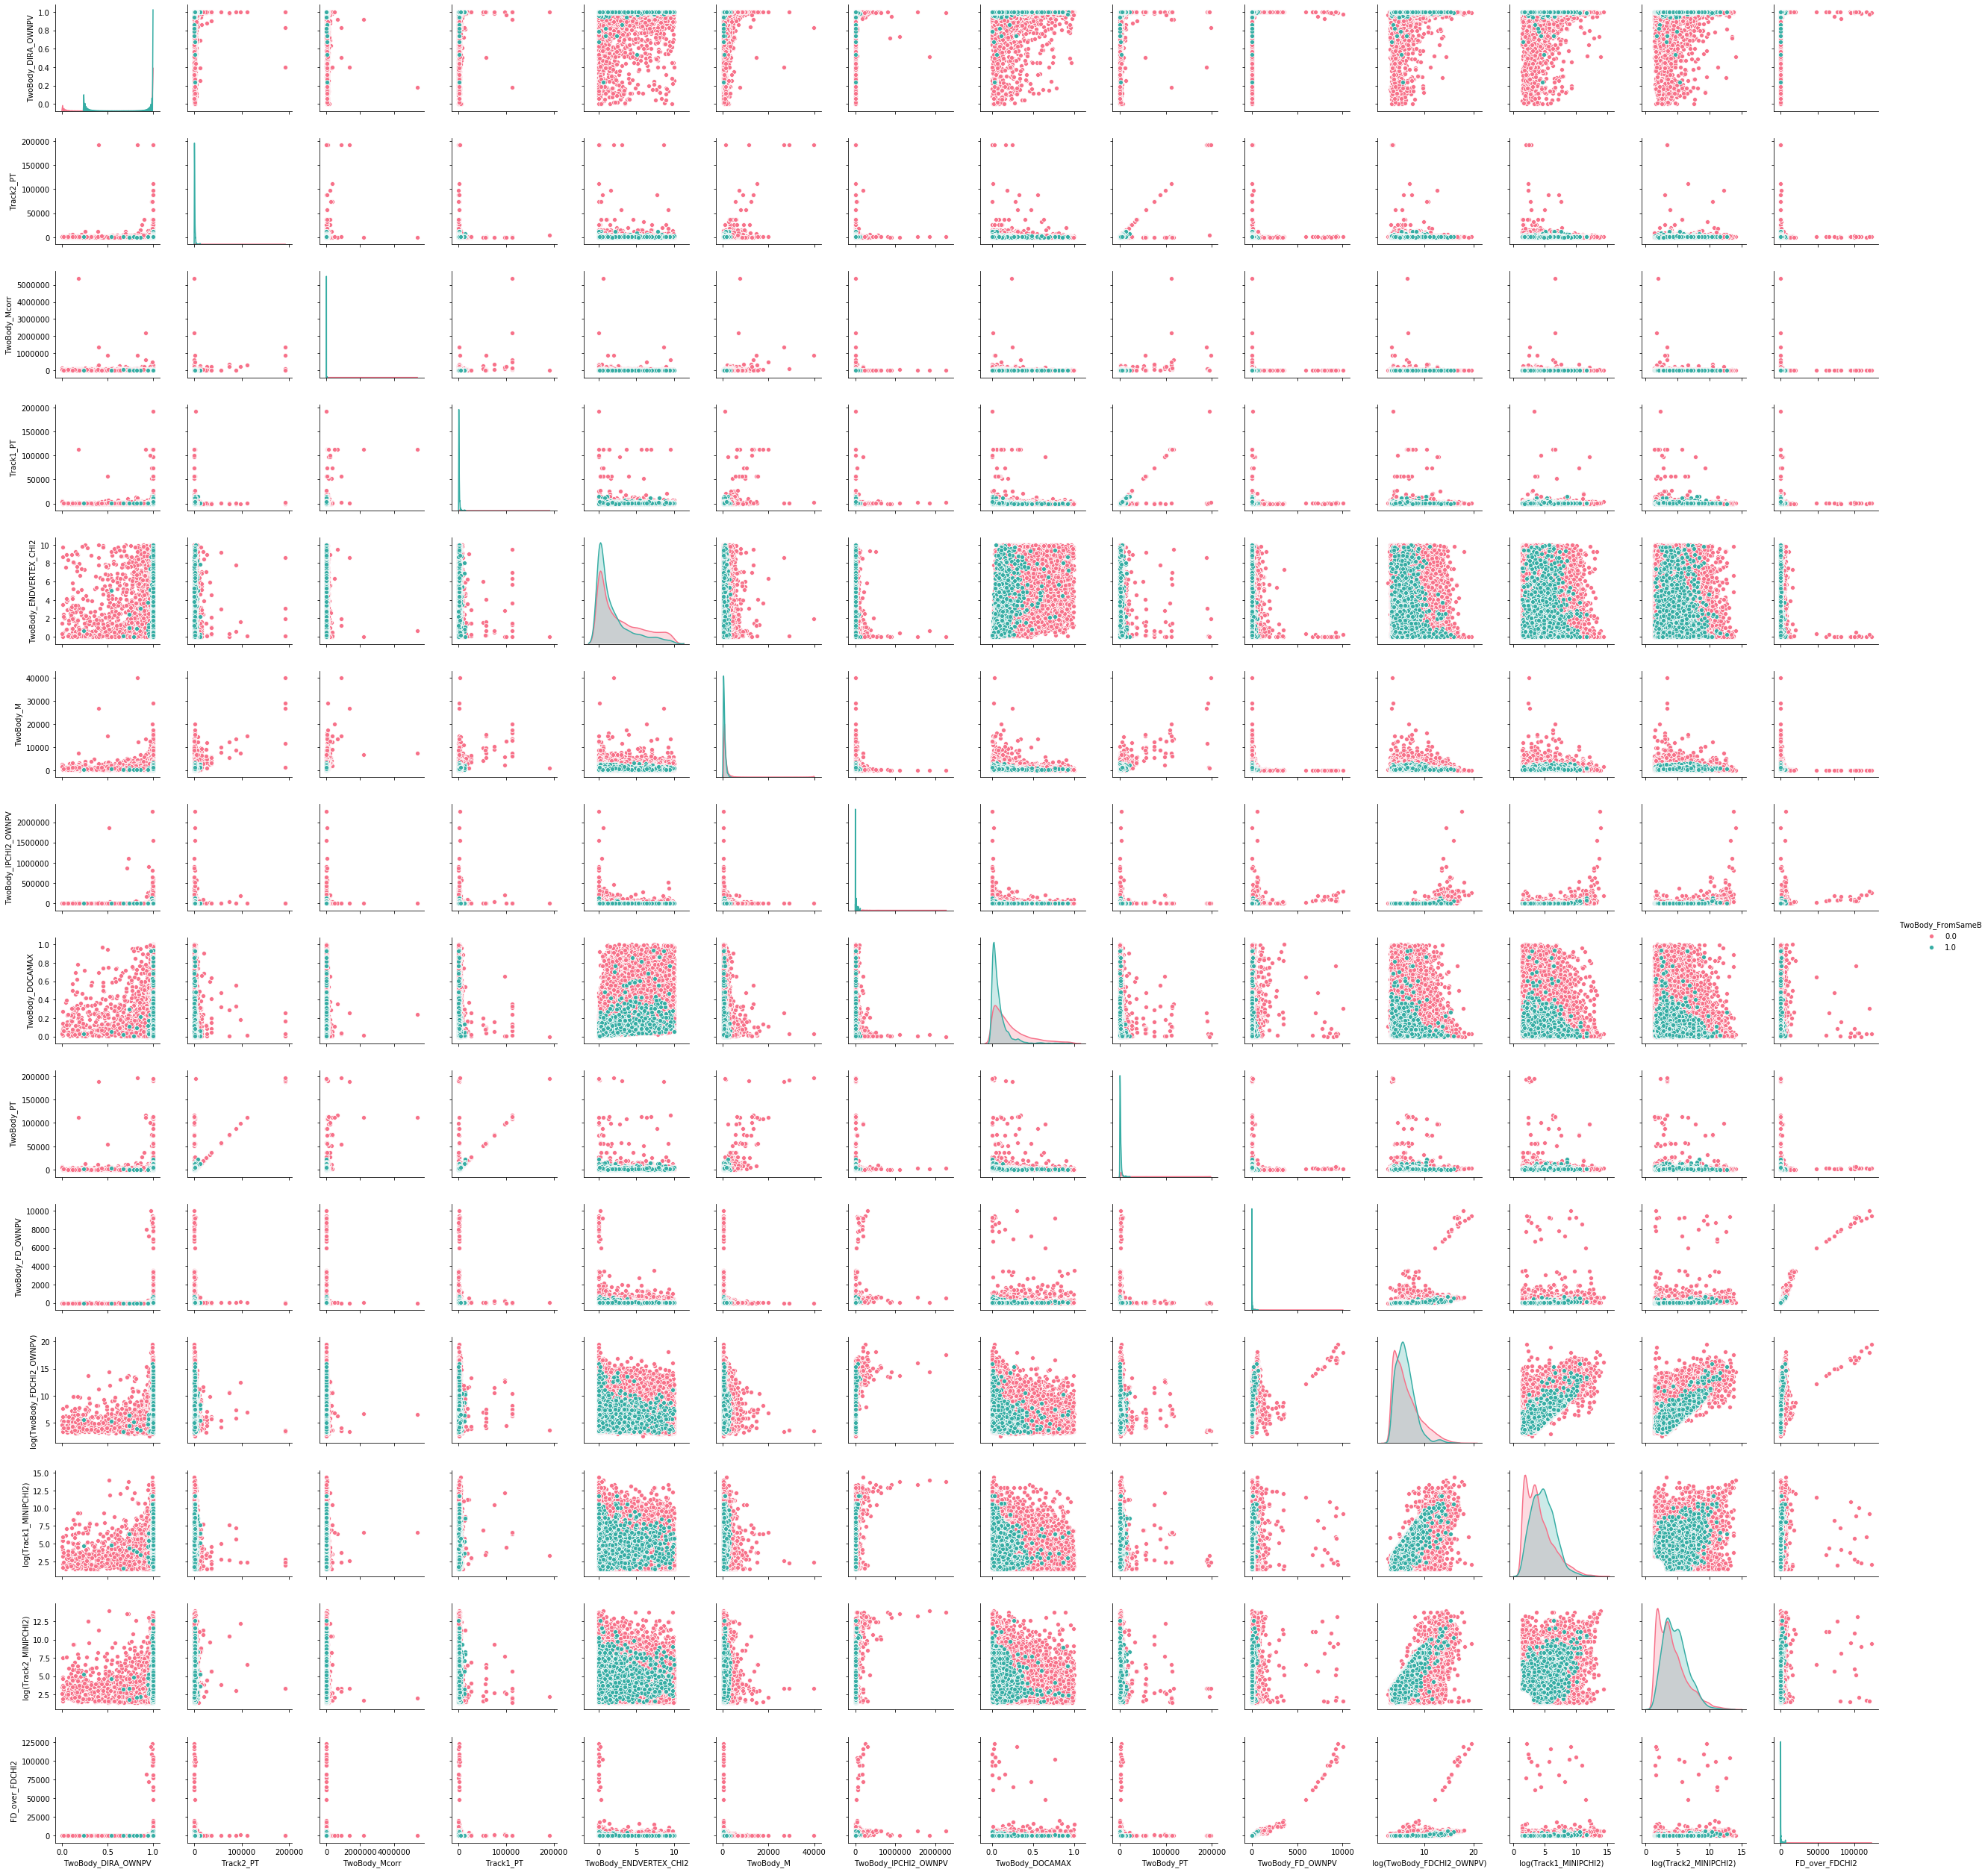

In [9]:
sns.pairplot(df, vars=feats, hue='TwoBody_FromSameB', palette='husl')

## Making some correlation plots

[]

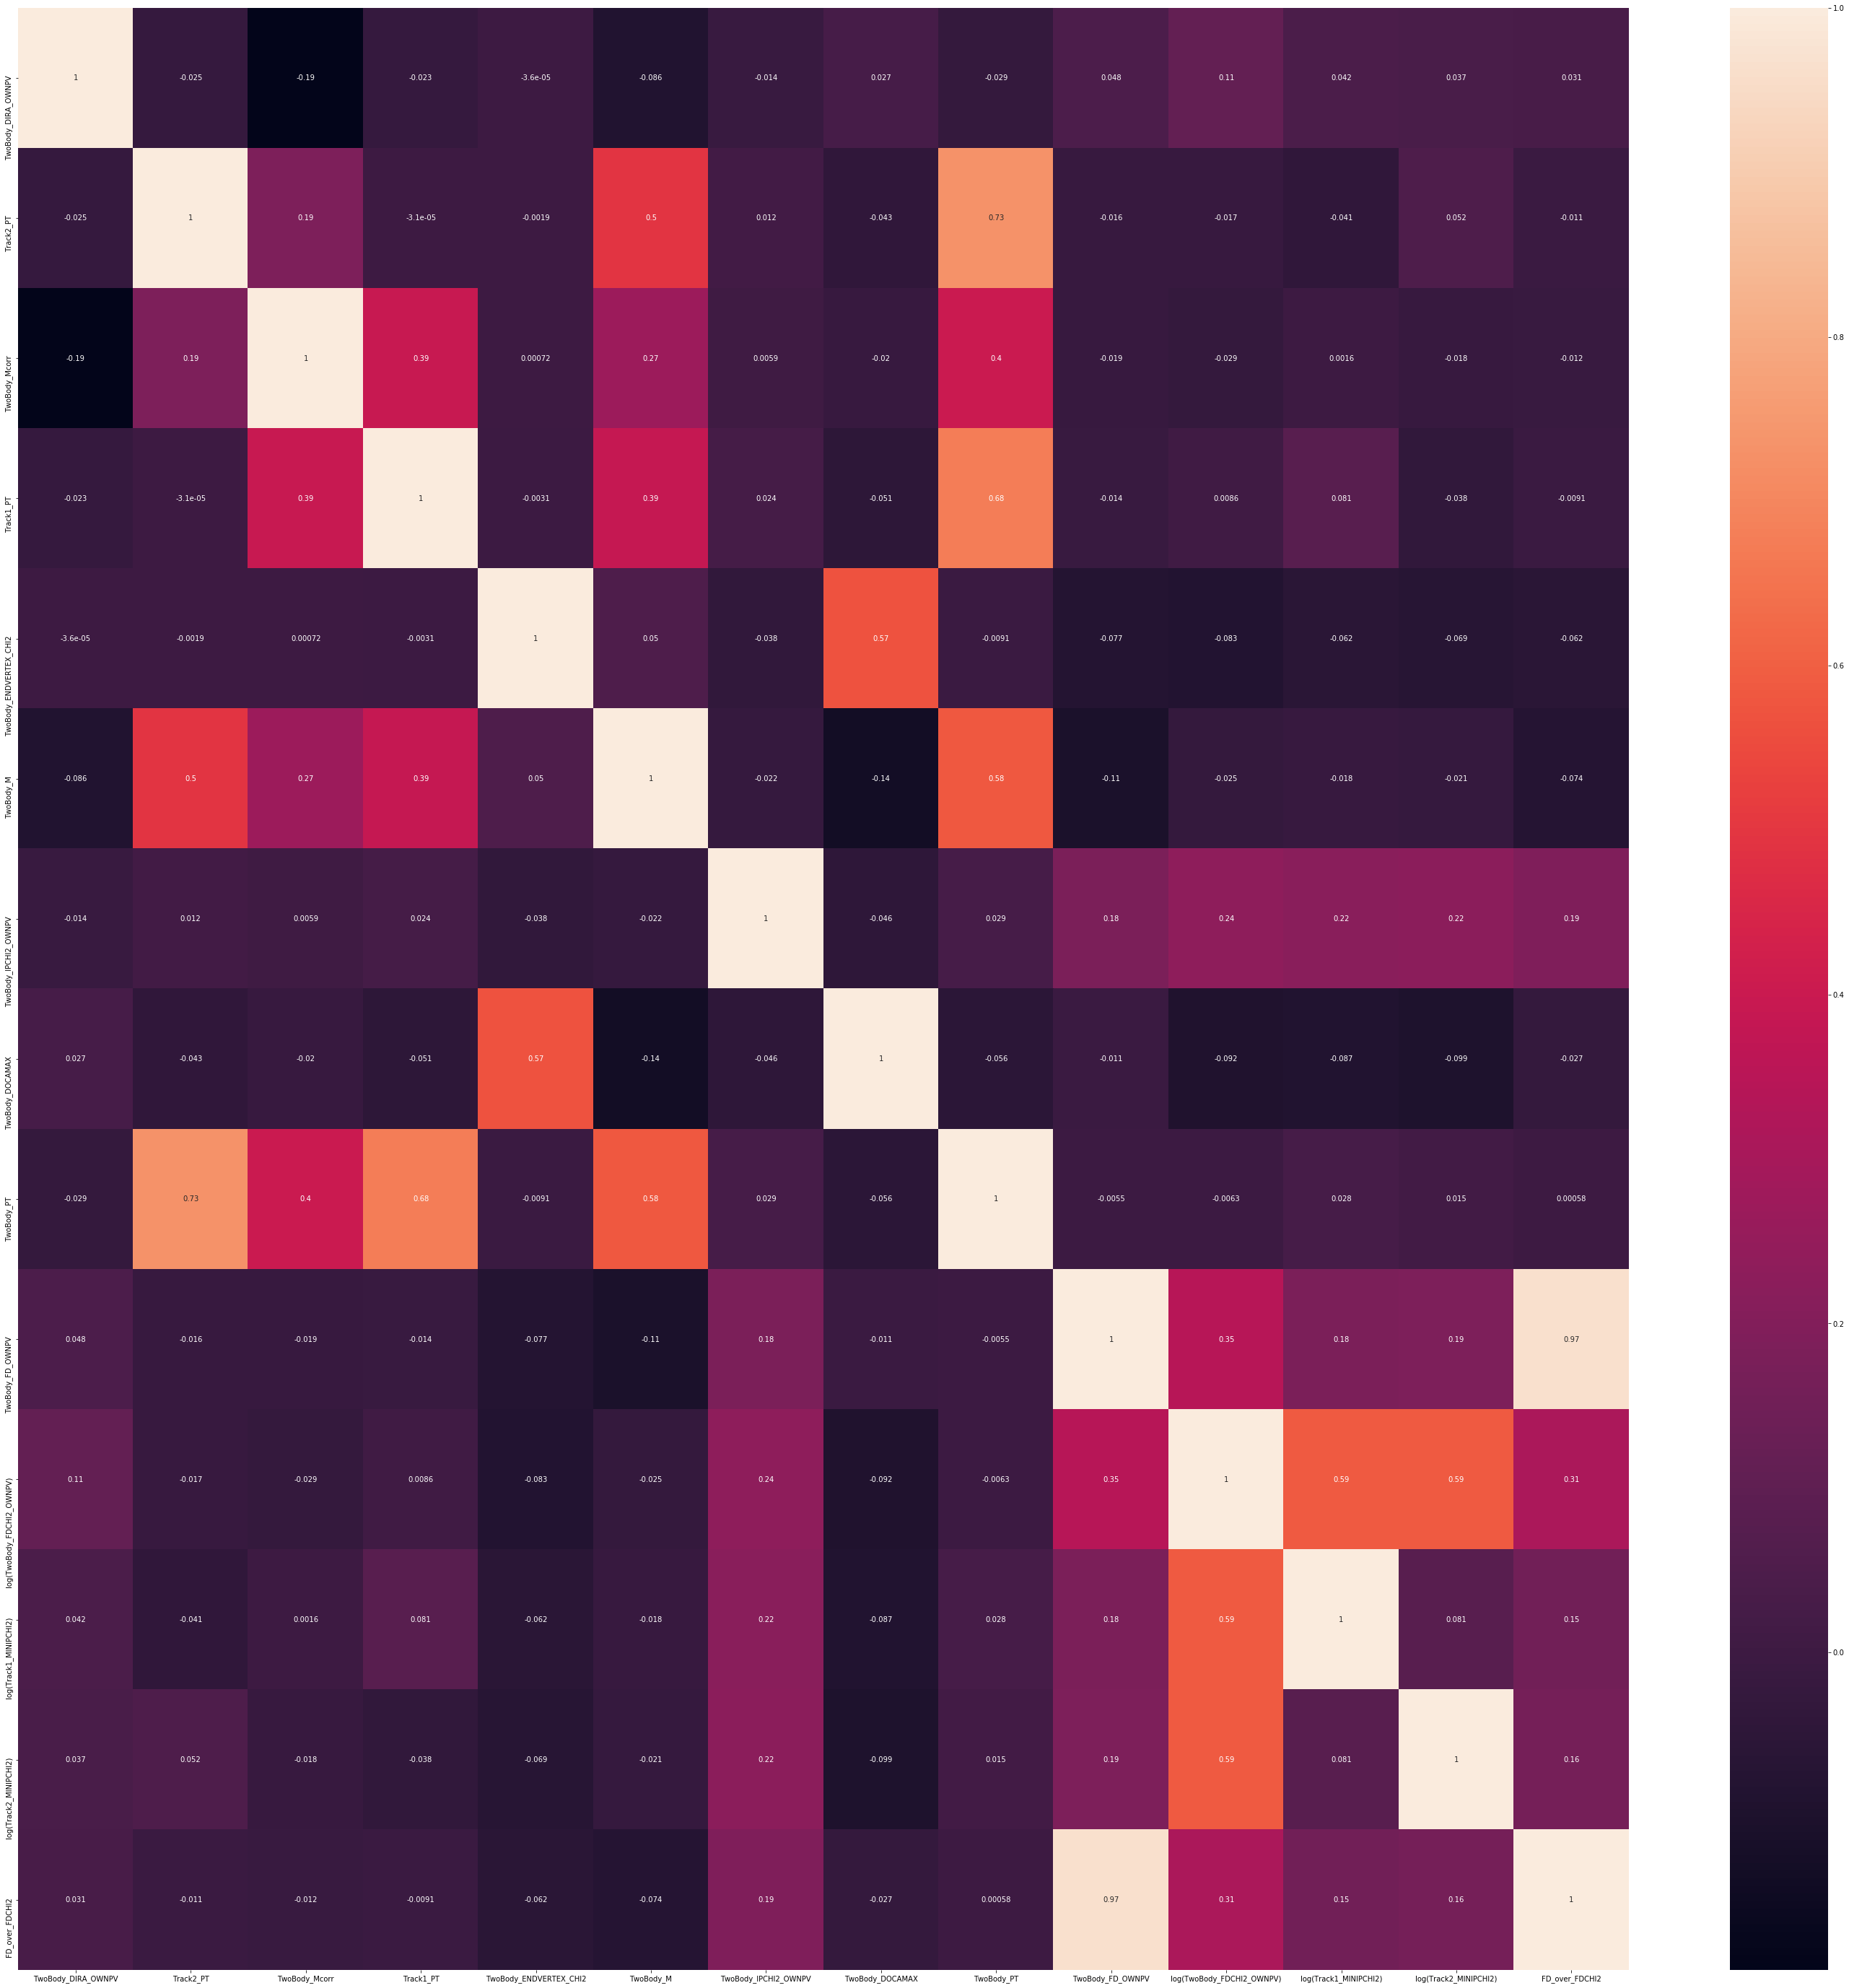

In [10]:
plt.figure(figsize=(50,50))
sns.heatmap(df[feats].corr(), annot=True)
plt.plot()